# Cost benefit refactoring

In [390]:
import numpy as np

from climada.util.api_client import Client
from climada.entity import ImpactFunc

from climada.entity import LitPop

import copy
client = Client()


In [391]:
# Parameters
ctr_str = 'DEU'

# Years to be considered
years = [2000, 2020, 2050]

## Create the snapshots - Exposure, Hazard sets, Impact Functions

## Exposure

### Define the Group

In [400]:
group_gdf_col_str = 'region_id' # The column name of the group in the gdf, Default is 'region_id'

In [409]:
exp_hist = LitPop().from_countries(countries=ctr_str, reference_year=years[0])

# Assign random Group_id of 3 possible to the gdf
group_id_arr = np.random.randint(0, 3, exp_hist.gdf.shape[0])
exp_hist.gdf[group_gdf_col_str] = group_id_arr

2024-05-29 09:11:36,730 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: DEU (276)...

2024-05-29 09:11:36,741 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-29 09:11:36,751 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-29 09:11:36,761 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-29 09:11:36,770 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-29 09:11:36,780 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-29 09:11:36,789 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-29 09:11:36,799 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-29 09:11:36,808 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-29 09:11:36,817 - climada.entity.exposures.litpop.gpw_population - 

In [412]:
unique_groups = np.unique(region_id_arr)
# Get indeices of each region_id in the region_id_arr array
group_map_exp_dict = {i: list(np.where(group_id_arr == i)[0]) for i in unique_groups}

In [329]:
# Present
exp_pres = LitPop().from_countries(countries=ctr_str, reference_year=years[1])
# Assign the region_ids
exp_pres.gdf[group_gdf_col_str= regroup_id_arroup_col_str

2024-05-28 19:18:34,232 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: DEU (276)...

2024-05-28 19:18:34,243 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-28 19:18:34,252 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-28 19:18:34,261 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-28 19:18:34,270 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-28 19:18:34,279 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-28 19:18:34,287 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-28 19:18:34,297 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-28 19:18:34,305 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-05-28 19:18:34,314 - climada.entity.exposures.litpop.gpw_population - 

In [330]:
# Future
exp_fut =copy.deepcopy(exp_pres)
# Exponential growth
exp_growth_rate = 0.01
exp_fut.gdf.value = exp_fut.gdf.value * (1 + exp_growth_rate)**(years[2] - years[1])
# Assign the region_ids
exp_fut.gdf[group_gdf_col_str= regroup_id_arroup_col_str

## Hazard sets

In [ ]:
haz_fl_1980 = client.get_hazard(
    hazard_type='river_flood',
    properties={
        'climate_scenario' : 'historical',
        'year_range': '1980_2000',
        'country_iso3alpha': 'DEU'
    })

2024-05-28 15:34:18,849 - climada.hazard.io - INFO - Reading /Users/ckropf/climada/data/hazard/river_flood/river_flood_150arcsec_hist_DEU_1980_2000/v2/river_flood_150arcsec_hist_DEU_1980_2000.hdf5


In [ ]:
haz_fl_2010 = client.get_hazard(
    hazard_type='river_flood',
    properties={
        'climate_scenario' : 'rcp85',
        'year_range': '2010_2030',
        'country_iso3alpha': 'DEU'
    })

2024-05-28 15:34:34,740 - climada.hazard.io - INFO - Reading /Users/ckropf/climada/data/hazard/river_flood/river_flood_150arcsec_rcp85_DEU_2010_2030/v3/river_flood_150arcsec_rcp85_DEU_2010_2030.hdf5


In [ ]:
haz_fl_2030 = client.get_hazard(
    hazard_type='river_flood',
    properties={
        'climate_scenario' : 'rcp85',
        'year_range': '2030_2050',
        'country_iso3alpha': 'DEU'
    })

2024-05-28 15:34:50,751 - climada.hazard.io - INFO - Reading /Users/ckropf/climada/data/hazard/river_flood/river_flood_150arcsec_rcp85_DEU_2030_2050/v3/river_flood_150arcsec_rcp85_DEU_2030_2050.hdf5


### Impact Functions

In [ ]:
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood, flood_imp_func_set
from climada.entity import ImpactFunc, ImpactFuncSet

impf_set_flood = flood_imp_func_set()

impf_1 = impf_set_flood.get_func(fun_id=1, haz_type='RF')
impf_2 = impf_set_flood.get_func(fun_id=2, haz_type='RF')
impfset = ImpactFuncSet([impf_1, impf_2])

In [ ]:
def assign_impfid(exp_hist, exp_pres, exp_fut, case='single'):
    if case=='single':
        exp_hist.gdf['impf_RF'] = 1
        exp_pres.gdf['impf_RF'] = 1
        exp_fut.gdf['impf_RF'] = 1
    if case=='multiple_spatial':
        exp_hist.gdf.loc[:len(exp_hist.gdf/2),'impf_RF'] = 1
        exp_pres.gdf[:len(exp_pres.gdf/2),'impf_RF'] = 1
        exp_fut.gdf[:len(exp_fut.gdf/2),'impf_RF'] = 1
        exp_hist.gdf.loc[len(exp_hist.gdf/2):,'impf_RF'] = 2
        exp_pres.gdf[len(exp_pres.gdf/2):,'impf_RF'] = 2
        exp_fut.gdf[len(exp_fut.gdf/2):,'impf_RF'] = 2
    if case=='multiple_temp':
        exp_hist.gdf['impf_RF'] = 1
        exp_pres.gdf['impf_RF'] = 1
        exp_fut.gdf['impf_RF'] = 2
    if case == ' multiple':
        exp_hist.gdf.loc[:len(exp_hist.gdf/2),'impf_RF'] = 1
        exp_pres.gdf[:len(exp_hist.gdf/2),'impf_RF'] = 2
        exp_fut.gdf[:len(exp_hist.gdf/2),'impf_RF'] = 1
        exp_hist.gdf.loc[len(exp_hist.gdf/2):,'impf_RF'] = 2
        exp_pres.gdf[len(exp_hist.gdf/2):,'impf_RF'] = 1
        exp_fut.gdf[len(exp_hist.gdf/2):,'impf_RF'] = 2

## From impacts to NPV

### Timeseries

In [ ]:
from climada.hazard import Hazard

haz_series = Hazard.concat([haz_fl_1980, haz_fl_2010, haz_fl_2030])

In [312]:
impact_set = {}
exposures = {}

assign_impfid(exp_hist, exp_pres, exp_fut, case='single')

for year in range(1980,2051,1):
    if year <= 2010:
        exposures[year] = exp_hist
    if year <= 2030:
        exposures[year] = exp_pres
    if year > 2030:
        exposures[year] = exp_fut

for year in range(1980,2051,1):
    print(f"Processing year {year}")
    exp = exposures[year]["exp"]
    haz = haz_series.select([f"{str(year)}-01-01",f"{str(year+1)}-01-01"])
    impact_set[year] = ImpactCalc(exp, impfset, haz).impact()

Processing year 1980


TypeError: Since CLIMADA 2.0, Exposures objects are not subscriptable. Data fields of Exposures objects are accessed using the `gdf` attribute. For example, `expo['value']` is replaced by `expo.gdf['value']`.

In [313]:
# a bit more complicated, do it user
def exposures_merger(exp_list):
    gdf_0 = exp_list[0].gdf[['geometry', 'value']]
    for n, exp in enumerate(exp_list[1:]):
        print(n)
        gdf_0 = gdf_0.sjoin(exp.gdf[['geometry', 'value']], rsuffix=f'{n}')
    return gdf_0

### Snapshots 

In [314]:
assign_impfid(exp_hist, exp_pres, exp_fut, case='single')
snapshots = {
    years[0] : [exp_hist, impfset, haz_fl_1980],
    years[1] : [exp_pres, impfset, haz_fl_2010],
    years[2] : [exp_fut, impfset, haz_fl_2030]
}

#### Calculate necessary risk metrics – yearly aai, rp, eai 

In [315]:
from climada.engine import Impact, ImpactCalc

In [316]:
impact_snapshots = {}
for year, [exp, impf, haz] in snapshots.items():
    impact_snapshots[year] = ImpactCalc(exp, impf, haz).impact()

2024-05-28 19:11:13,970 - climada.entity.exposures.base - INFO - Exposures matching centroids already found for RF
2024-05-28 19:11:13,971 - climada.entity.exposures.base - INFO - Existing centroids will be overwritten for RF
2024-05-28 19:11:13,971 - climada.entity.exposures.base - INFO - Matching 661396 exposures with 26472 centroids.
2024-05-28 19:11:13,981 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2024-05-28 19:11:14,666 - climada.engine.impact_calc - INFO - Calculating impact for 1969149 assets (>0) and 920 events.
2024-05-28 19:11:14,792 - climada.entity.exposures.base - INFO - Matching 661396 exposures with 26472 centroids.
2024-05-28 19:11:14,798 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2024-05-28 19:11:15,474 - climada.engine.impact_calc - INFO - Calculating impact for 196914

### Calculate the expect annual impact between snapshots 2000 and 2020 

In [317]:
from scipy.sparse import lil_matrix

def interpolate_sm(mat_start, mat_end, year, year_start, year_end):
    if year < year_start or year > year_end:
        raise ValueError("Year must be within the start and end years")

    # Calculate the ratio of the difference between the target year and the start year
    # to the total number of years between the start and end years
    ratio = (year - year_start) / (year_end - year_start)

    # Convert the input matrices to a format that allows efficient modification of its elements
    mat_start = lil_matrix(mat_start)
    mat_end = lil_matrix(mat_end)

    # Perform the linear interpolation
    mat_interpolated = mat_start + ratio * (mat_end - mat_start)

    return mat_interpolated

# Derive the intermediate propability distributions
def interpolate_years(year_start, year_end):
    # Generate an array of interpolated values between 0 and 1
    values = np.linspace(0, 1, num=year_end-year_start+1)
    return values

# Derive the intermediate propability distributions
prop_H1 = interpolate_years(years[0], years[1])
prop_H0 = 1 - prop_H1

# Define the start and end years
start_year = years[0]
end_year = years[1]

# Case 1 - H2000# Impact 1)  Hazard 2000  and Exposure 2000
imp_eE0H0=  ImpactCalc(exp_hist, impfset, haz_fl_1980).impact()
imp_E1H0 = ImpactCalc(exp_pres, impfset, haz_fl_1980).impact()# Impact 2)  Hazard 2000  and Exposure 2020

# Case 2 - H2020
# Impact 1)  Hazard 2000  and Exposure 2000
imp_E0H1 = ImpactCalc(exp_hist, impfset, haz_fl_2010).impact()
imp_E1H1 = ImpactCalc(exp_pres, impfset, haz_fl_2010).impact()


2024-05-28 19:11:17,254 - climada.entity.exposures.base - INFO - Exposures matching centroids already found for RF
2024-05-28 19:11:17,254 - climada.entity.exposures.base - INFO - Existing centroids will be overwritten for RF
2024-05-28 19:11:17,255 - climada.entity.exposures.base - INFO - Matching 661396 exposures with 26472 centroids.
2024-05-28 19:11:17,262 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2024-05-28 19:11:17,942 - climada.engine.impact_calc - INFO - Calculating impact for 1969149 assets (>0) and 920 events.
2024-05-28 19:11:18,066 - climada.entity.exposures.base - INFO - Exposures matching centroids already found for RF
2024-05-28 19:11:18,067 - climada.entity.exposures.base - INFO - Existing centroids will be overwritten for RF
2024-05-28 19:11:18,067 - climada.entity.exposures.base - INFO - Matching 661396 exposures with 26472 centroids.
2024-05-28 19:11:18,074 - climada

In [352]:
# Calculate the AAI for each year
aai_0 = []
eai_exp_0 = []
eai_region_id_0 = []
frequency = haz_fl_1980.frequency
for year in range(start_year, end_year + 1):
    imp_mat_intrpl = interpolate_sm(imp_E0H0.imp_mat, imp_E1H0.imp_mat, year, start_year, end_year)
    # sum across the rows of the sparse matrix
    eai_exp = ImpactCalc.eai_exp_from_mat(imp_mat_intrpl, frequency)
    # Region_id (Groups)
    eai_region_id = []
    for group_id, exp_indices in group_map_exp_dict.items():
        eai_region_id.append(np.sum(eai_exp[exp_indices]))
    eai_region_id_0.append(eai_region_id)
    eai_exp_0.append(eai_exp)
    aai_0.append(ImpactCalc.aai_agg_from_eai_exp(eai_exp))

# Calculate the AAI for each year
aai_1 = []
eai_exp_1 = []
eai_region_id_1 = []
frequency = haz_fl_2010.frequency
for year in range(start_year, end_year + 1):
    imp_mat_intrpl = interpolate_sm(imp_E0H1.imp_mat, imp_E1H1.imp_mat, year, start_year, end_year)
    # sum across the rows of the sparse matrix
    eai_exp = ImpactCalc.eai_exp_from_mat(imp_mat_intrpl, frequency)
     # Region_id (Groups)
    eai_region_id = []
    for group_id, exp_indices in group_map_exp_dict.items():
        eai_region_id.append(np.sum(eai_exp[exp_indices]))

    eai_region_id_1.append(eai_region_id)
    eai_exp_1.append(eai_exp)
    aai_1.append(ImpactCalc.aai_agg_from_eai_exp(eai_exp))


# Average Annual Impact across the years
aai = prop_H0 * aai_0 + prop_H1 * aai_1
# EAI exp across bthe years
eai = np.multiply(prop_H0.reshape(-1,1), eai_exp_0) + np.multiply(prop_H1.reshape(-1,1), eai_exp_1)
# EAI region_id across the years
eai_region_id = np.multiply(prop_H0.reshape(-1,1), eai_region_id_0) + np.multiply(prop_H1.reshape(-1,1), eai_region_id_1)

### Calculate the NPV (between years 2000 to 2020)

#### Define the discount rate

<Axes: title={'center': 'Discount rates'}, xlabel='Year', ylabel='discount rate (%)'>

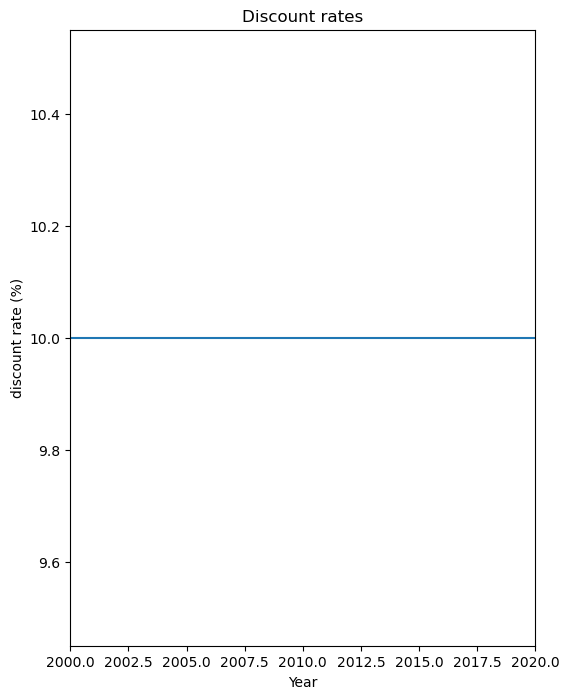

In [413]:
import numpy as np
from climada.entity import DiscRates
from climada.util import finance as u_fin

# define discount rates
path_years = np.arange(years[0], years[1]+1)
# INcrease the discount rate to 1.4%
rates = np.linspace(0.10, 0.10, path_years.size)
disc = DiscRates(years=path_years, rates=rates)
disc.plot()

#### Calc the NPV

In [420]:
u_fin.net_present_value(disc.years, disc.rates, aai)

433868364873.73773

In [419]:
NPV = np.sum(aai/np.array([(1 + disc.rates)**n for n in range(len(aai))]))
print(f"Expected NPV: {NPV}")

Expected NPV: 11907525621945.84


In [ ]:
import climada.util.coordinates as u_coord

def impact_at_reg(eai_exp, agg_regions=None):
        """Aggregate impact on given aggregation regions. This method works
        only if Impact.imp_mat was stored during the impact calculation.

        Parameters
        ----------
        agg_regions : np.array, list (optional)
            The length of the array must equal the number of centroids in exposures.
            It reports what macro-regions these centroids belong to. For example,
            asuming there are three centroids and agg_regions = ['A', 'A', 'B']
            then impact of the first and second centroids will be assigned to
            region A, whereas impact from the third centroid will be assigned
            to area B. If no aggregation regions are passed, the method aggregates
            impact at the country (admin_0) level.
            Default is None.

        Returns
        -------
        np.array()
        """
        agg_reg_unique = np.unique(agg_regions, return_index=True)

        at_reg_event = np.hstack(
            [
                imp_mat[:, ].sum(1)
                for reg in agg_reg_unique
            ]
        )

        return at_reg_event

In [319]:

"""Compute impact exceedance frequency curve.

Parameters
----------
return_per : np.array, optional
    return periods where to compute
    the exceedance impact. Use impact's frequencies if not provided

Returns
-------
ImpactFreqCurve
"""

at_event = np.array([1, 2, 3, 4, 5])
frequency = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
return_per = np.array([5, 100, 200, 500, 1000, 20000])

# Sort descendingly the impacts per events
sort_idxs = np.argsort(at_event)[::-1]
# Calculate exceedence frequency
exceed_freq = np.cumsum(frequency[sort_idxs])
# Set return period and impact exceeding frequency
ifc_return_per = 1 / exceed_freq[::-1]
ifc_impact = at_event[sort_idxs][::-1]

interp_imp = np.interp(return_per, ifc_return_per, ifc_impact)
ifc_return_per = return_per
#percentiles = 1/ifc_return_permultiply the frequency with the impact matrix such that each row is multiplied by the frequency for the respective event

# sum across the rows of the sparse matrix


In [320]:
interp_imp

array([4., 5., 5., 5., 5., 5.])

In [321]:
def calculate_return_periods(event_impacts, annual_frequencies, return_periods):
    # Calculate annual total impact
    annual_total_impact = np.dot(event_impacts, annual_frequencies)

    # Define the function to get the percentile for a given return period
    def get_percentile(return_period):
        return 100 * (1 - 1/return_period)

    # Calculate the percentiles and values
    percentiles = [get_percentile(rp) for rp in return_periods]
    values = np.percentile(annual_total_impact, percentiles)

    # Convert percentiles to probabilities (1 - percentile/100)
    probabilities = [1 - p/100 for p in percentiles]

    return np.array(probabilities), np.array(values)

# Example usage
event_impacts = np.array([10, 20, 30, 40, 50])
annual_frequencies = np.array([0.01, 0.01, 0.01, 0.04, 0.01])
return_periods = [100, 200, 500, 1000, 2000]

probabilities, values = calculate_return_periods(event_impacts, annual_frequencies, return_periods)
print("Probabilities:", probabilities)
print("Values:", values)

Probabilities: [0.01   0.005  0.002  0.001  0.0005]
Values: [2.7 2.7 2.7 2.7 2.7]


In [ ]:
impact_snapshots[year]

In [100]:
mat0 = impact_snapshots[years[0]].imp_mat
mat1 = impact_snapshots[years[1]].imp_mat

In [ ]:
np.interp()

## Measures

In [ ]:
from climada.entity import Measure, MeasureSet

In [347]:
meas1 = Measure(
    name='meas1',
    haz_type='RF',
    cost=100,
    mdd_impact=(0.9,0)
)
meas1.start = years[0]
meas1.end = years[1]

In [354]:
meas2 = Measure(
    name='meas2',
    haz_type='RF',
    cost=10000,
    hazard_inten_imp=(0.7, 0)
)
meas2.start = years[0]
meas2.end = years[2]

In [355]:
meas3 = Measure(
    name='meas3',
    haz_type='RF',
    cost=100,
    imp_fun_map='1to2'
)
meas3.start = years[0] + 5
meas3.end = years[1]

In [90]:
meas_set = MeasureSet(
    [meas1, meas2, meas3]
)

In [300]:
meas1.apply(exp, impfset, haz)

(<climada.entity.exposures.litpop.litpop.LitPop at 0x1dcba4af0>,
 <climada.hazard.base.Hazard at 0x1dcbe0370>)

In [ ]:
from scipy.sparse import lil_matrix

def interpolate_sm(mat_start, mat_end, year, year_start, year_end):
    if year < year_start or year > year_end:
        raise ValueError("Year must be within the start and end years")

    # Calculate the ratio of the difference between the target year and the start year
    # to the total number of years between the start and end years
    ratio = (year - year_start) / (year_end - year_start)

    # Convert the input matrices to a format that allows efficient modification of its elements
    mat_start = lil_matrix(mat_start)
    mat_end = lil_matrix(mat_end)

    # Perform the linear interpolation
    mat_interpolated = mat_start + ratio * (mat_end - mat_start)

    return mat_interpolated

# Derive the intermediate propability distributions
def interpolate_years(year_start, year_end):
    # Generate an array of interpolated values between 0 and 1
    values = np.linspace(0, 1, num=year_end-year_start+1)
    return values

# Derive the intermediate propability distributions
prop_H1 = interpolate_years(years[0], years[1])
prop_H0 = 1 - prop_H1

# Define the start and end years
start_year = years[0]
end_year = years[1]

# Case 1 - H2000# Impact 1)  Hazard 2000  and Exposure 2000
imp_E0H0=  ImpactCalc(exp_hist, impfset, haz_fl_1980).impact()
imp_E1H0 = ImpactCalc(exp_pres, impfset, haz_fl_1980).impact()# Impact 2)  Hazard 2000  and Exposure 2020

# Case 2 - H2020
# Impact 1)  Hazard 2000  and Exposure 2000
imp_E0H1 = ImpactCalc(exp_hist, impfset, haz_fl_2010).impact()
imp_E1H1 = ImpactCalc(exp_pres, impfset, haz_fl_2010).impact()

In [350]:
m_exp, m_haz, m_impf = meas3.apply(exp_hist, impfset, haz_fl_2030)b
m_exp_2, m_haz_2, m_impf_2 = meas3.apply(exp_pres, impfset, haz_fl_2030)

In [ ]:
# Define the start and end years
start_year = meas3.start
end_year = meas3.end

# Case 1 - H2000# Impact 1)  Hazard 2000  and Exposure 2000
imp_mE0H0=  ImpactCalc(m_exp, impfset, haz_fl_1980).impact()
imp_mE1H0 = ImpactCalc(exp_pres, impfset, haz_fl_1980).impact()# Impact 2)  Hazard 2000  and Exposure 2020

# Case 2 - H2020
# Impact 1)  Hazard 2000  and Exposure 2000
imp_mE0H1 = ImpactCalc(exp_hist, impfset, haz_fl_2010).impact()
imp_mE1H1 = ImpactCalc(exp_pres, impfset, haz_fl_2010).impact()